# Data exploration

In [1]:
import pandas as pd
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import os
import random
from skimage import io
from tqdm import tqdm
from IPython.display import HTML
from utils.helpers import *

# autoreload
%reload_ext autoreload
%autoreload 2

# Get the current working directory
current_dir = os.getcwd()

# Define the path to the data
data_path = os.path.join(current_dir, 'data')

print(f"Data path: {data_path}")

Data path: /Users/lharriso/Documents/GitHub/gm4cs-l/data


In [2]:
# Load the data
data = load_data(data_path, 'ssp585_time_series.pkl')

Loading data from ssp585_time_series.pkl
Data loaded successfully.


In [3]:
# Print the keys of the data (only the first 5)
print(f"Keys of the data: {list(data.keys())[:5]}")

Keys of the data: ['ICON-ESM-LR', 'EC-Earth3', 'EC-Earth3-Veg-LR', 'FIO-ESM-2-0', 'CMCC-CM2-SR5']


In [4]:
# Keep only models which have more than 4 runs (>= 4 runs)
filtered_data = filter_data(data)

Filtering data...


100%|██████████| 72/72 [00:00<00:00, 61492.54it/s]

Data filtered. Kept 34 models


## Plot a time stamp for a randomly chosen model

In [5]:
filtered_data.keys()

dict_keys(['ICON-ESM-LR', 'EC-Earth3', 'CMCC-CM2-SR5', 'ACCESS-CM2', 'CESM2', 'CNRM-ESM2-1', 'IPSL-CM6A-LR', 'GISS-E2-2-G', 'CNRM-CM6-1', 'CanESM5-1', 'E3SM-2-0-NARRM', 'HadGEM3-GC31-LL', 'MIROC-ES2L', 'GISS-E2-1-H', 'E3SM-2-0', 'GISS-E2-1-G', 'EC-Earth3-Veg', 'ACCESS-ESM1-5', 'HadGEM3-GC31-MM', 'FGOALS-g3', 'E3SM-1-0', 'MPI-ESM1-2-HR', 'CanESM5', 'CAS-ESM2-0', 'MIROC6', 'NESM3', 'GISS-E2-2-H', 'MPI-ESM1-2-LR', 'AWI-CM-1-1-MR', 'UKESM1-0-LL', 'NorCPM1', 'INM-CM5-0', 'MRI-ESM2-0', 'CESM2-FV2'])

In [6]:
# chose a key randomly
example_model = 'CanESM5-1'
example_model_data = filtered_data[example_model]
print(f"Randomly selected model: {example_model}, which has {len(example_model_data)} runs.")

Randomly selected model: CanESM5-1, which has 72 runs.


In [7]:
first_example_model_run = example_model_data[list(example_model_data.keys())[0]]
first_example_model_run.shape # Shape: (Time x Latitude x Longitude)

(165, 72, 144)

In [8]:
random_timestamp = random.randint(0, first_example_model_run.shape[0])
data_to_plot = first_example_model_run[random_timestamp, :, :]
print(f"Random timestamp: {random_timestamp}")

Random timestamp: 154


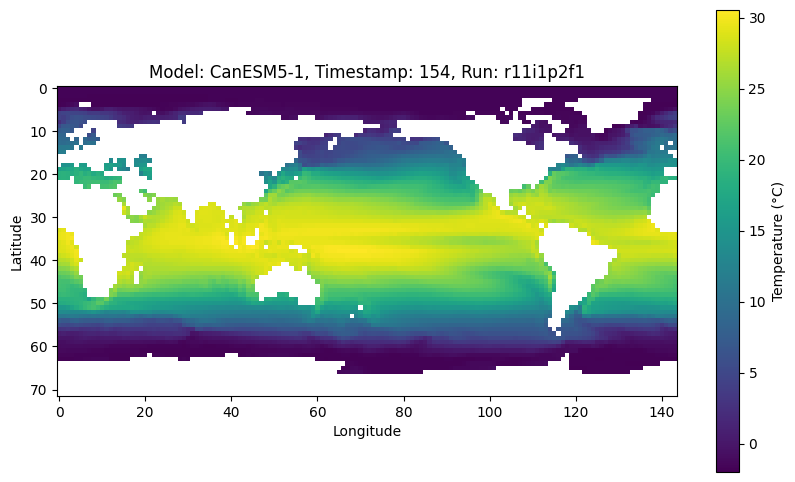

In [9]:
# Plot the data
# Create a colormap that sets NaN values to a specific color (e.g., gray)
plt.figure(figsize=(10, 6))
plt.imshow(data_to_plot, cmap='viridis') # Places the origin in the lower left
plt.colorbar(label='Temperature (°C)')
plt.title(f'Model: {example_model}, Timestamp: {random_timestamp}, Run: {list(example_model_data.keys())[0]}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Get a mask of all the grids where there is at least one NaN value (for all models and all runs)

In [10]:
# Create a NaN mask
nan_mask = create_nan_mask(filtered_data)
print(f"The grid has a shape of: {nan_mask.shape}.")

Creating NaN mask...


100%|██████████| 34/34 [00:02<00:00, 13.74it/s]

NaN mask created.
The grid has a shape of: (72, 144).


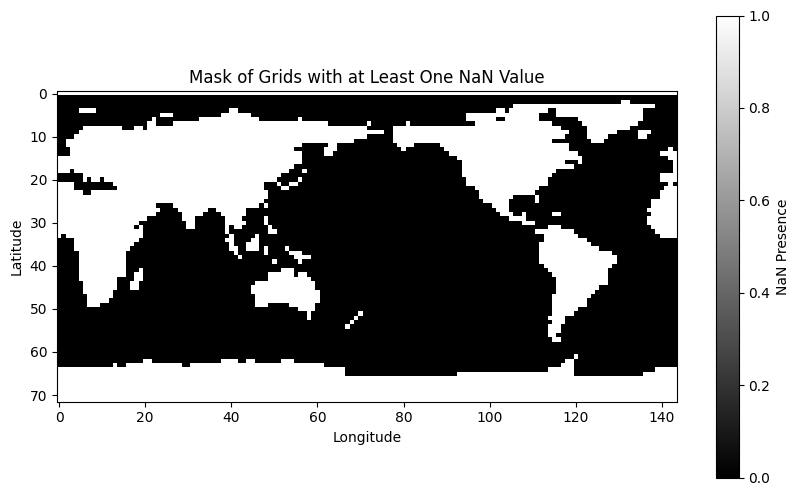

In [11]:
# Plot the mask
plt.figure(figsize=(10, 6))
plt.imshow(nan_mask, cmap='gray')
plt.colorbar(label='NaN Presence')
plt.title('Mask of Grids with at Least One NaN Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Remove all grid cells that contain at least one NaN

In [12]:
nan_filtered_data = mask_out_nans(filtered_data, nan_mask)

Masking out NaN values...


100%|██████████| 34/34 [00:01<00:00, 27.80it/s]

NaN values masked out.


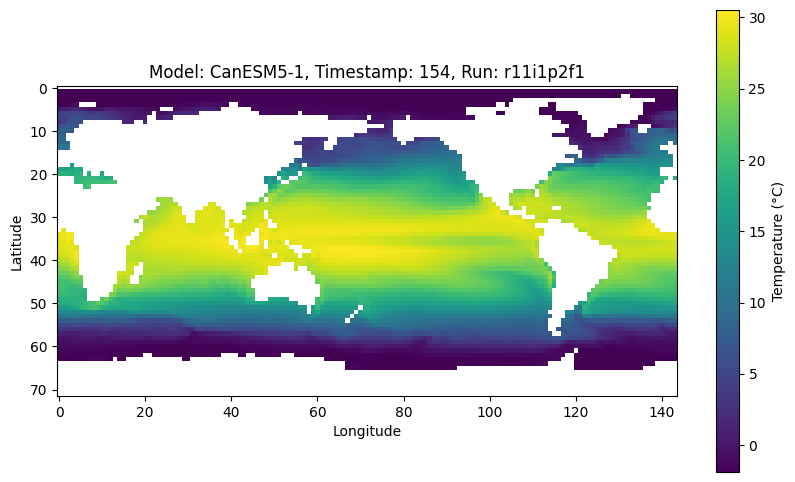

In [13]:
# Example of plotting a random run after applying the NaN filter
example_model_data = nan_filtered_data[example_model]
chosen_run = list(example_model_data.keys())[0]
example_model_run = example_model_data[chosen_run]

nan_removed_data_sample = example_model_run[random_timestamp, :, :]

# Plot the data
plt.figure(figsize=(10, 6))
plt.imshow(nan_removed_data_sample, cmap='viridis')  # Plotting the first time step as an example
plt.colorbar(label='Temperature (°C)')
plt.title(f'Model: {example_model}, Timestamp: {random_timestamp}, Run: {chosen_run}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Centering of the data for each cell

In [14]:
# Center the data
centered_data = center_data(nan_filtered_data)

  0%|          | 0/34 [00:00<?, ?it/s]/Users/lharriso/Documents/GitHub/gm4cs-l/utils/helpers.py:117: RuntimeWarning: Mean of empty slice
  grid_average = np.nanmean(runs_stack, axis=(0, 1))
/opt/anaconda3/envs/main/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/lharriso/Documents/GitHub/gm4cs-l/utils/helpers.py:120: RuntimeWarning: Mean of empty slice
  forced_response = np.nanmean(np.stack(list(centered_data[model].values()), axis=0), axis=0)
100%|██████████| 34/34 [00:17<00:00,  1.92it/s]


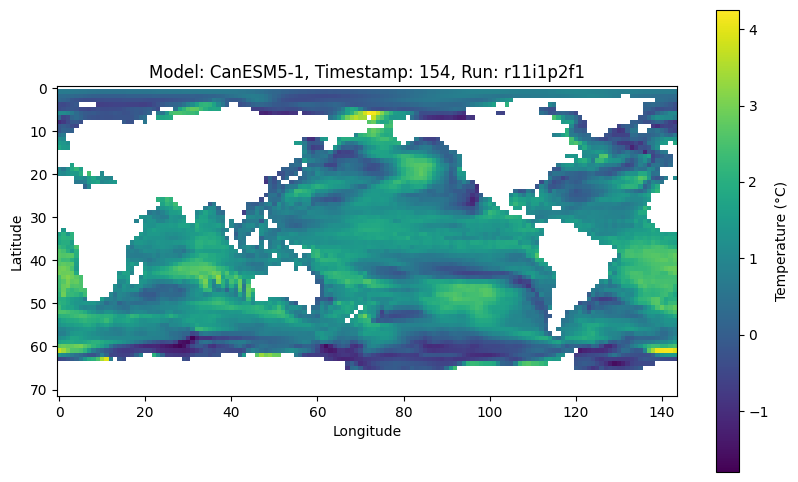

In [15]:
# Example of plotting a random run after applying the NaN filter
data_to_plot = centered_data[example_model][chosen_run]

# Plot the data
plt.figure(figsize=(10, 6))
plt.imshow(data_to_plot[random_timestamp, :, :], cmap='viridis')  # Plotting the first time step as an example
plt.colorbar(label='Temperature (°C)')
plt.title(f'Model: {example_model}, Timestamp: {random_timestamp}, Run: {chosen_run}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Displaying the forced response and runs for grid spot: [36 93]


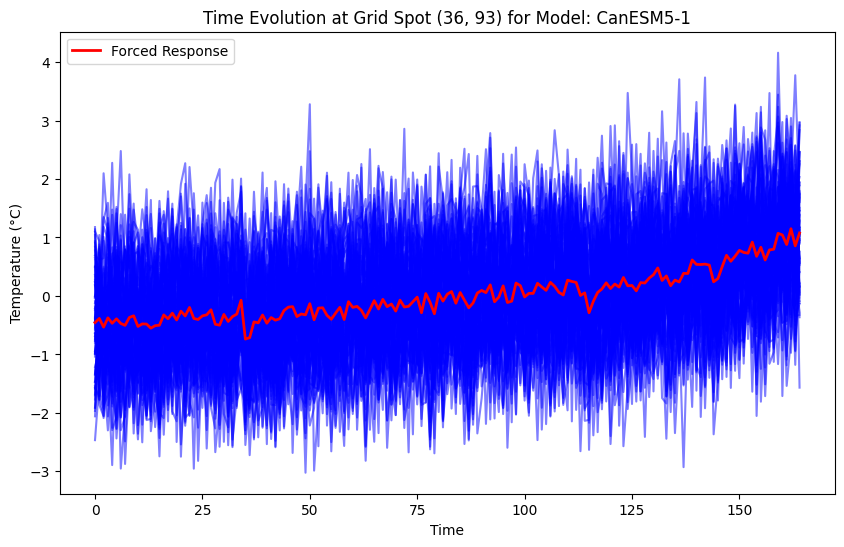

In [16]:
# Example of plotting the forced response for a random model
valid_grid_spots = np.argwhere(~nan_mask)
random_grid_spot = valid_grid_spots[random.randint(0, len(valid_grid_spots))]
print(f"Displaying the forced response and runs for grid spot: {random_grid_spot}")

# Data for each run
time_series_data = {run : centered_data[example_model][run][:, random_grid_spot[0], random_grid_spot[1]] for run in centered_data[example_model]}
forced_response_data = centered_data[example_model]['forced_response'][:, random_grid_spot[0], random_grid_spot[1]]

# Plot the time series data for all runs and the forced response
plt.figure(figsize=(10, 6))
for data in time_series_data.values():
    plt.plot(data, color='blue', alpha=0.5)
plt.plot(forced_response_data, color='red', label='Forced Response', linewidth=2)
plt.title(f'Time Evolution at Grid Spot ({random_grid_spot[0]}, {random_grid_spot[1]}) for Model: {example_model}')
plt.xlabel('Time') # Need to change this
plt.ylabel('Temperature (°C)')
# plt.ylim(-2,4)
plt.legend()
plt.show()

In [17]:
# The number of runs for the example model
print(f"Number of runs for the example model: {len(centered_data[example_model])}")

Number of runs for the example model: 73


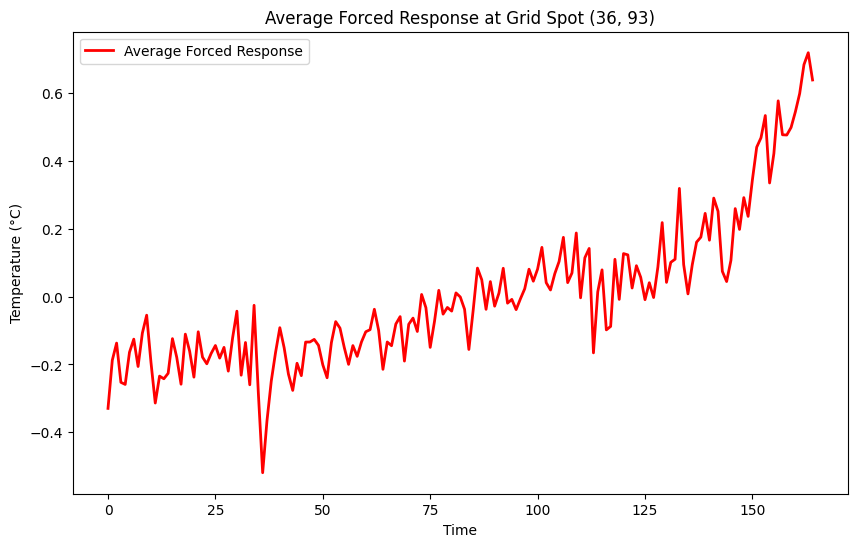

In [18]:
# Plot the average forced response of all models for that given grid spot
average_forced_response = np.mean([centered_data[model]['forced_response'][:, random_grid_spot[0], random_grid_spot[1]] for model in centered_data], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(average_forced_response, color='red', label='Average Forced Response', linewidth=2)
plt.title(f'Average Forced Response at Grid Spot ({random_grid_spot[0]}, {random_grid_spot[1]})')
plt.xlabel('Time') # Need to change this
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

## Now we will animate the data for the randomly chosen model

In [24]:
# Create the animation
animation = animate_data(data_to_plot)

# Display the animation
HTML(animation.to_html5_video())